In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale=2)
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 加载数据
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure.csv')
data.head(3)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [3]:
# 观察数据将 Not Available 转换为 np.nan
data = data.replace({"Not Available": np.nan})

In [4]:
# 将 object to float
for col in data.columns.to_list():
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
    col or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)

In [5]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_precent = 100 * df.isnull().sum() / len(df)
    # 每列缺失值的个数，每页缺失值的占比做成表
    mis_val_table = pd.concat([mis_val, mis_val_precent], axis=1)
    mis_val_table.rename(columns={0: "Missing Values", 1: '% of Total Values'},inplace=True)
    mis_val_table = mis_val_table[
            mis_val_table.iloc[:, 1] != 0
    ].sort_values("% of Total Values", ascending=False).round(1)
    print(
        f"Your selected datafrom has {str(df.shape[1])} columns.\n"
        f"There are {str(mis_val_table.shape[0])} columns that have missing values."
    )
    return mis_val_table
# missing_values_table(data)

In [6]:
missing_df = missing_values_table(data)
missing_colums = missing_df[missing_df['% of Total Values'] > 50].index.to_list()
print(f"we will remove {len(missing_colums)} columns. ")

Your selected datafrom has 60 columns.
There are 46 columns that have missing values.
we will remove 11 columns. 


In [7]:
data = data.drop(columns=list(missing_colums))
data.shape

(11746, 49)

### Exploratory Data Analysis
- 探索性数据分析(EDA)是一个开放式的过程，在这个过程中，我们可以绘制表并计算统计数据以便探索我们的数据。EDA本身可能很有趣(例如找两个变量之前的关联) 或者它们可以用于通知建模的决策， 例如使用那些功能。 简而言之，EDA的目标是确定我们的数据可以告诉我们什么！
- 简单就是说画图来理解数据... EDA 探索性数据分析， 本质就是用画图的方式来理解数据。

In [8]:
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,1963,2,100,Whole Building,NaN,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,38139374.2,11082770.5,6962.2,0.0,6962.2,762051.0,NaN,NaN,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,1969,12,100,Whole Building,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,933073441.0,9330734.4,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181.0,NaN,NaN,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,231342.0,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.0,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1305748.0,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694.0,1932,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,179694.0,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


Text(0.5, 1.0, 'Energy Star Score Distribution')

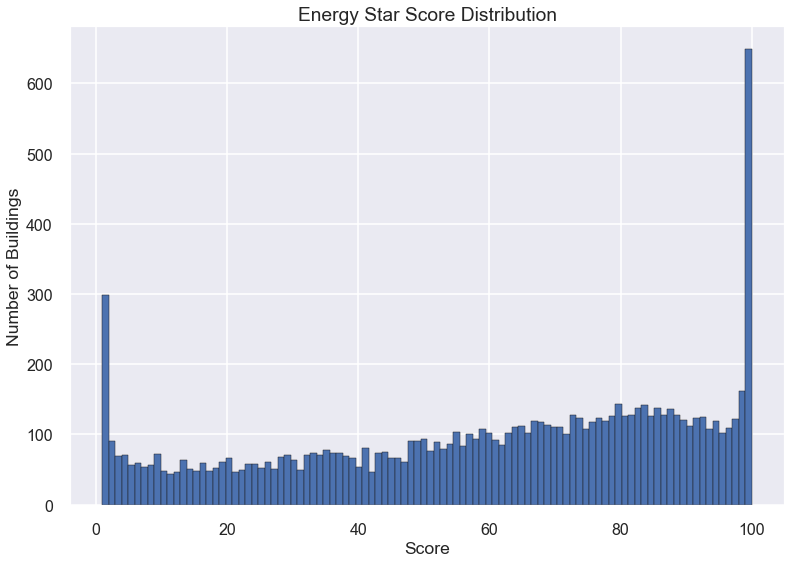

In [9]:
figsize(8, 8)
data.rename(columns={'ENERGY STAR Score': "score"}, inplace=True)
# fivethirtyeight
plt.style.use('seaborn-poster')
plt.hist(data['score'].dropna(), bins=100, edgecolor='k')
plt.xlabel("Score")
plt.ylabel("Number of Buildings")
plt.title('Energy Star Score Distribution')

> 分析:
1. 看起来0,100 这两个极端很多，可以视为离群点。
2. Energy Use Intensity 能源使用强度(EUI): the total energy uee divided by the square footage of the building. 这个指标应该更合理一些。EUI: 所以能源的消耗以他的一个总面积，似乎比上面的1~100的指标很合理的

Text(0.5, 1.0, 'Site EUI Distribution')

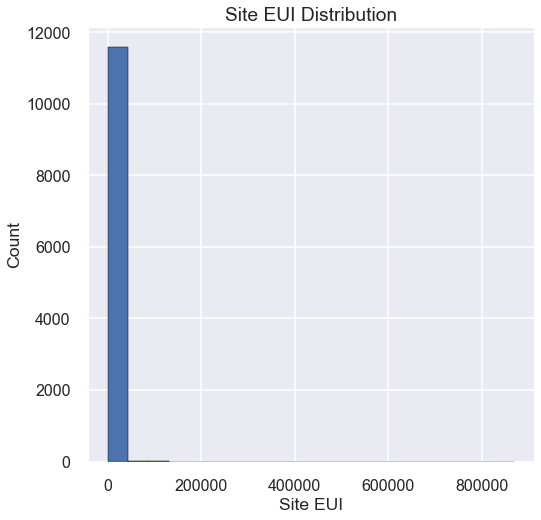

In [10]:
# Site EUI (kBtu/ft²); 能源使用强度
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [11]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

### 探究数据的意义.
均值mean小，标准差很大，就意味着有很多点离均值很远 ----- 就有离群点.

In [12]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [13]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


### 剔除离群点。
> Q1 - 25%

> Q2 - 50%

> Q3 - 75%

> IQ = Q3 - Q1

- First Quarile - 3 * Interquartile Range
- First Quarile + 3 * Interquartile Range

In [14]:
# 在describe 取25%和75%分位
# first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
# third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']
# # 2者一减就是IQ值，就是间隔
# iqr = third_quartile - first_quartile

# data = data[
#     (data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
#     (data['Site EUI (kBtu/ft²)'] < (first_quartile + 3 * iqr))
# ]
# 抽象成一个方法
def remove_outliers_data(data, columns):
    for column in columns:
        describe_quartile = data[column].describe()
        first_quartile = describe_quartile['25%']
        third_quartile = describe_quartile['75%']
        iqr = third_quartile - first_quartile 
        data = data[
            (data[column] > (first_quartile - 3 * iqr)) &
            (data[column] < (first_quartile + 3 * iqr))
        ]
    return data

In [15]:
# 疑问点：某个特征可以经过很多次 剔除离群点，多次剔除离群点，数据分布就很均匀，没有离群点
# 这样会不会对  原有数据产生损伤，不能够体现出真实的市场价值。
data = remove_outliers_data(data, ("Site EUI (kBtu/ft²)", ))
data.shape

(11137, 49)

Text(0.5, 1.0, 'Site EUI Distribution')

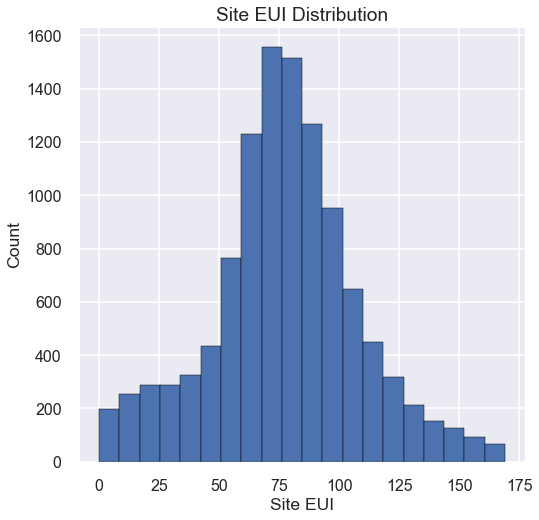

In [16]:
# 能源使用强度(EUI), 剔除离群点后应该有的正态分布
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=20, edgecolor='black')
plt.xlabel("Site EUI")
plt.ylabel("Count")
plt.title("Site EUI Distribution")

### 观察那些变量会对结果产生影响
kdeplot(密度图)这最实用

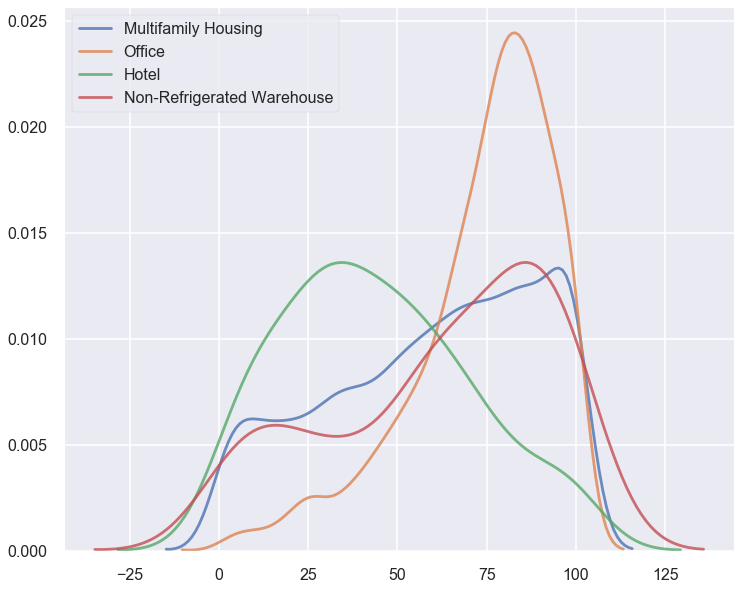

In [17]:
types = data.dropna(subset=['score'])
# Largest Property Use Type: 最大财产使用类型
types = types['Largest Property Use Type'].value_counts()
# 找出数量相对比价多的，查看规律
types = list(types[types.values > 100].index)

figsize(12, 10)
for line_type in types:
    subset = data[data['Largest Property Use Type'] == line_type]
    # alpha 透明度 shade 阴影
    sns.kdeplot(subset['score'].dropna(), label=line_type, shade=False, alpha=0.8)

### 灵魂质问 ---- 看图说话:
1. 75-100 之前 office 占用的比重特别多。而且相比其他用途高出很多。原因有哪些？ 政策，还是建筑风格， 办公。
2. Hotel 的比重子在 25 - 50 之前比重比较多。原因又有哪些？  住宅和其他物业类型的不同
3. 多用途房间 与 非冷藏的 仓库的 图像相似度很高。 难道是公用？ 商用，仓库


- 修改了阀值 增加了 K-12 school 和 Residence Hall/Dormitory 发现和 多功能还有 仓库 相似 和 hotel 的分布 差异很大，说明我们的推论有问题。 并非是 物业类型的问题。

- 抽时间可以 深入挖掘一下， 什么原因导致的这种分布
- 或许可以用这个特征为标签，练习一下多分类问题

In [18]:
# 查看当前的结果跟地区有什么结果
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Borough')

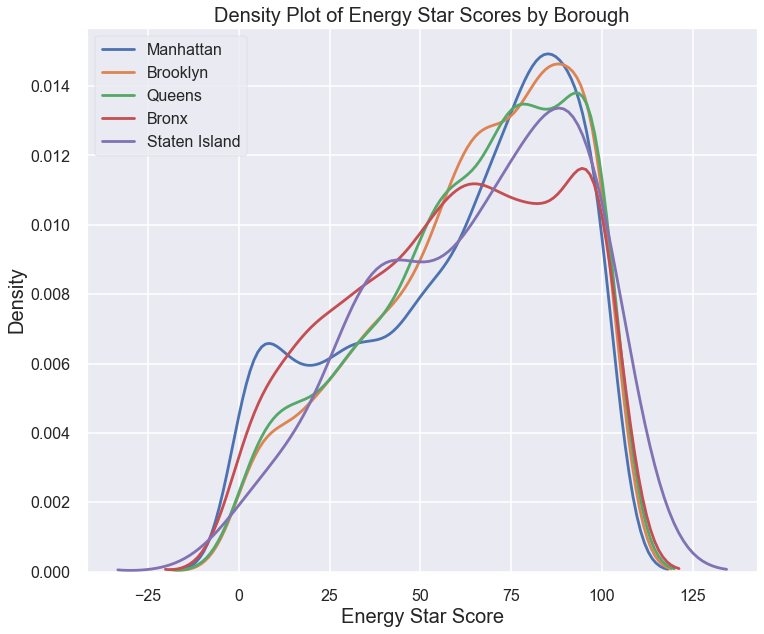

In [19]:
figsize(12, 10)
for borough in boroughs:
    subset = data[data['Borough'] == borough]
    sns.kdeplot(subset['score'].dropna(), label=borough)

plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density Plot of Energy Star Scores by Borough', size=20)

> 特征分类对结果影响不大

### 特征和标签之间的相关性
Pearson 先关系数，Pearson取值范围子在[-1, 1]之间的，接近-1的值越负相关，相反 1 就是正相关。0 就是不相关

In [20]:
correlations_data = data.corr()['score'].sort_values()
print(correlations_data.head(10), '\n')
print(correlations_data.tail(10), '\n')

Site EUI (kBtu/ft²)                                          -0.722387
Weather Normalized Site EUI (kBtu/ft²)                       -0.709932
Weather Normalized Source EUI (kBtu/ft²)                     -0.649943
Source EUI (kBtu/ft²)                                        -0.645732
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.354165
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.324983
Direct GHG Emissions (Metric Tons CO2e)                      -0.139004
Weather Normalized Site Natural Gas Use (therms)             -0.127951
Year Built                                                   -0.127209
Natural Gas Use (kBtu)                                       -0.127024
Name: score, dtype: float64 

Water Use (All Water Sources) (kgal)                 -0.009800
Water Intensity (All Water Sources) (gal/ft²)        -0.009202
Census Tract                                         -0.004948
DOF Gross Floor Area                                  0.014854
Property

In [21]:
import warnings
warnings.filterwarnings('ignore')
# 获取所有的数值数据
numeric_subset = data.select_dtypes('number')
for col in numeric_subset.columns:
    if col != 'score':
        continue
    numeric_subset[f'sqrt_{col}'] = np.sqrt(numeric_subset[col])
    numeric_subset[f'log_{col}'] = np.log(numeric_subset[col])    

In [22]:
categorical_subset = data[['Borough', 'Largest Property Use Type']]
categorical_subset = pd.get_dummies(categorical_subset)
# 合并pd, 数值型和 热编码
features = pd.concat([numeric_subset, categorical_subset], axis=1)
# sort_values()
correlations = features.corr()["score"].dropna().sort_values()
correlations.head(15)

Site EUI (kBtu/ft²)                                          -0.722387
Weather Normalized Site EUI (kBtu/ft²)                       -0.709932
Weather Normalized Source EUI (kBtu/ft²)                     -0.649943
Source EUI (kBtu/ft²)                                        -0.645732
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.354165
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.324983
Direct GHG Emissions (Metric Tons CO2e)                      -0.139004
Weather Normalized Site Natural Gas Use (therms)             -0.127951
Year Built                                                   -0.127209
Natural Gas Use (kBtu)                                       -0.127024
Largest Property Use Type_Multifamily Housing                -0.109819
Total GHG Emissions (Metric Tons CO2e)                       -0.099879
Largest Property Use Type_Hotel                              -0.086575
Latitude                                                     -0.048605
Proper

In [23]:
correlations.tail(15)

Property GFA - Self-Reported (ft²)                                 0.021604
Largest Property Use Type - Gross Floor Area (ft²)                 0.022673
Largest Property Use Type_Retail Store                             0.026337
Largest Property Use Type_Supermarket/Grocery Store                0.026673
Largest Property Use Type_Residence Hall/Dormitory                 0.035641
Borough_Queens                                                     0.035793
Order                                                              0.039530
Largest Property Use Type_Hospital (General Medical & Surgical)    0.045498
Borough_Brooklyn                                                   0.045735
Community Board                                                    0.054609
Council District                                                   0.060450
Largest Property Use Type_Office                                   0.163978
log_score                                                          0.885864
sqrt_score  

Text(0.5, 1, 'Energy Star Score vs Site EUI')

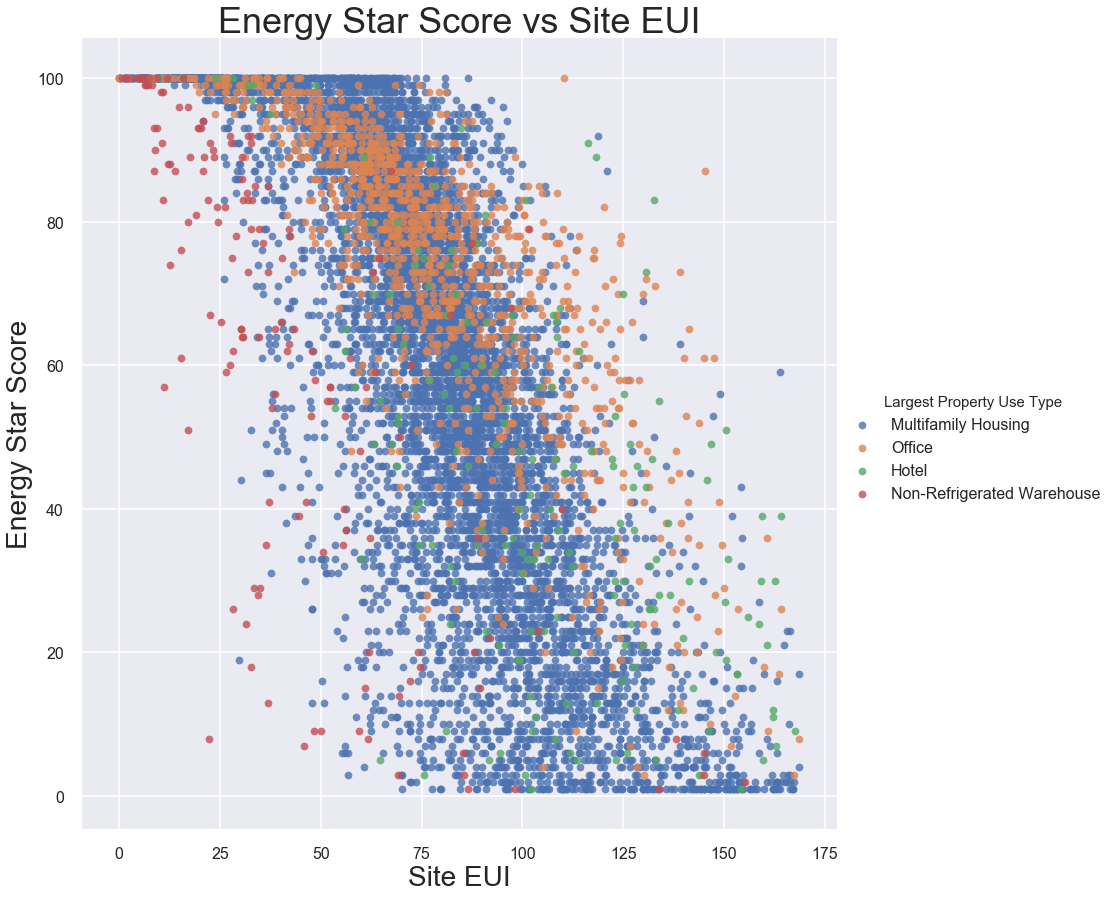

In [24]:
figsize(12,10)
features['Largest Property Use Type'] = data.dropna(subset=['score'])['Largest Property Use Type']
features = features[features['Largest Property Use Type'].isin(types)]

sns.lmplot(
    'Site EUI (kBtu/ft²)', 
    'score',
    hue="Largest Property Use Type",
    data=features,
    scatter_kws={'alpha': 0.8, 's': 60},
    fit_reg=False,
    size=12,
    aspect=1.0
)
plt.xlabel("Site EUI", size=28)
plt.ylabel("Energy Star Score", size=28)
plt.title("Energy Star Score vs Site EUI", size=36)

### 特征工程 与 特征筛选
- 通过EDA 我们已经度数据有了一定的了解，比如我们发现建筑类型对结果影响差别很大，经过一些数值变换（log）并不会对结果产生影响
1. 特征工程
   > 就是尽可能的多的在数据中提取特征，各种数据变换，特征组合，分解等手段齐上
2. 特征筛选
   > 就是找到最有价值的那些特征作为我们的模型的输入，有可能之前做了那么多，可能是多余的，有些可能还没有被发现， 所以这两个阶段都是一个反复子在更新的过程。比如我们在建模之后拿到了特征重要性，这就为特征选择做了参考，有些不重要的我可以去掉，那些比较重要的，我还可以在想办法让其做更多变换和组合来促进我的模型。所以特征工程并不是一次性就能解决的，需要通过个整结果来反复斟酌。


In [25]:
features = data.copy()
numeric_subset = data.select_dtypes('number')
# 遍历特征的数值型咋一个列表中
for col in numeric_subset.columns:
    if col == 'score':
        continue
    numeric_subset[f'log_{col}'] = np.log(numeric_subset[col])
categorical_subset = data[['Largest Property Use Type', 'Borough']]

categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis=1)
features.shape

(11137, 110)

#### 删除共线特征

0.996499959841685


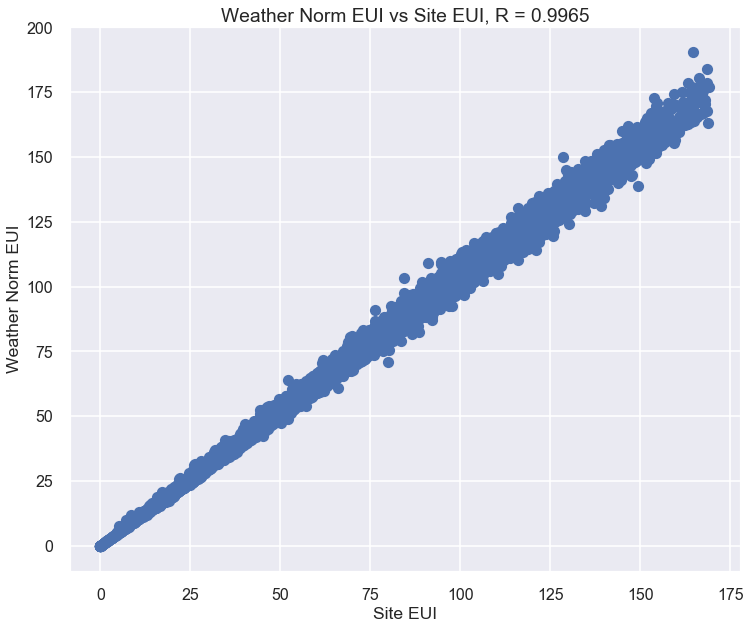

In [26]:
plot_data = data[['Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)']].dropna()
plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
# 横轴是天气正常指数的使用强度， 纵轴是能源使用强度
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1])
print(np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1])
# plt.title('Weather Norm EUI vs Site EUI, R= %0.4f' % np.corrcoef())

In [27]:
# 剔除共线特征
def remove_collinear_features(x, threshold):
    y = x['score']
    x = x.drop(columns=['score'])
    # 计算一个矩阵， 两两之间的先关系数
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            #  如果相关系数大于设置的阀值
            if val >= threshold:
                drop_cols.append(col.values[0]) # 去掉的直接加载进来
    # 设置好列后
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    x['score'] = y
    return x

In [28]:
features = remove_collinear_features(features, 0.6)
features = features.dropna(axis=1, how='all')
features.shape

(11137, 67)

### 数据集划分

In [29]:
# 特征中没有得分值
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]
print(no_score.shape)
print(score.shape)

(1817, 67)
(9320, 67)


In [30]:
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])
features = features.replace({np.inf: np.nan, -np.inf: np.nan})
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6524, 66)
(2796, 66)
(6524, 1)
(2796, 1)


### 建立Baseline
- 在建模之前，我们得有一个最坏的打算，就是模型起码有点作用才行

> 建立Baseline 实际上是我们可以比较我们的结果的一种猜测。如果机器学习模型没有超越这个猜测，那么我们可能必须得出结论，机器学习对于任务来说是不可接受的，或者我们可能需要尝试不同的方法。

对于回归问题，合理的Baseline是猜测测试集中所有示例的训练集上目标的中值。这设置了一个任何模型都要超越的相对较低的标准。

这里我们将使用的度量标准是平均绝对误差(Mean Absolute Error)(MAE)， 它测量预测的平均绝对误差。有很多回归的指标，选择一个指标，然后在评估模型时坚持使用它。平均绝对误差很容易计算，并且可以解释。

在计算 Baseline 之前，我们需要将我们的数据分为训练集和一个测试集
1. 训练集是我们在训练期间给我们的模型提供特征以及答案的。目的是让模型学习特征与目标之间的映射
2. 测试集合的特征用于评估训练的模型。模型不允许查看测试集的答案。并且只能使用特征进行预测。我们知道测试集的答案， 因此我们可以将测试预测与答案进行比较。

In [31]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [32]:
baseline_guess = np.median(y_train)

print(f'The baseline guess is a score of {baseline_guess}')
print(f'Baseline Prefromance on the test set: MAE={mae(y_test, baseline_guess)}')

The baseline guess is a score of 67.0
Baseline Prefromance on the test set: MAE=score    24.267525
dtype: float64


In [33]:
no_score.to_csv('data/no_score.csv', index=False)
X_train.to_csv('data/training_features.csv', index=False)
X_test.to_csv('data/testing_features.csv', index=False)
y_train.to_csv('data/training_labels.csv', index=False)
y_test.to_csv('data/testing_labels.csv', index=False)

### 建立基础模型，尝试多种算法

In [34]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)
# 可视化
import matplotlib.pyplot as plt
%matplotlib  inline

plt.rcParams['font.size'] = 24
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
# 机器学习算法库
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# 调参工具包
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [35]:
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

print("Training Feature Size:", train_features.shape)
print("Testing Feature Size:", test_features.shape)
print("Traing Labels Size", train_labels.shape)
print("Testing Labels Size", test_labels.shape)

Training Feature Size: (6524, 66)
Testing Feature Size: (2796, 66)
Traing Labels Size (6524, 1)
Testing Labels Size (2796, 1)


In [36]:
train_features.head(12)

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,log_Direct GHG Emissions (Metric Tons CO2e),log_Water Intensity (All Water Sources) (gal/ft²),Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,...,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,Borough_Staten Island
0,6412,4520863,177094.0,1931,1,100,82.7,17.3,0.3,4018949.7,44319.0,NaN,40.816133,-73.917503,1.0,71.0,5.363637,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8294,4398329,72750.0,1929,1,100,92.2,2.6,0.8,5788990.6,61616.6,NaN,40.840093,-73.846132,10.0,200.0,5.783517,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1996,2591543,219718.0,1930,1,100,92.1,11.0,0.6,20891622.2,238719.0,NaN,40.743004,-73.992721,5.0,58.0,7.011845,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9963,2810089,228879.0,1951,1,100,53.7,8.7,0.3,5583200.0,65563.7,0.65,40.727016,-73.933892,1.0,589.0,5.692384,-0.430783,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4462,2664583,194856.0,1962,1,100,82.6,8.6,0.3,6294910.2,62564.0,NaN,40.770917,-73.959742,8.0,126.0,5.812338,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,13347,4040481,105000.0,1939,1,100,108.4,3.4,0.0,539500.0,5395.0,NaN,NaN,NaN,NaN,NaN,6.648337,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6630,3260049,92065.0,1920,1,100,127.1,19.1,NaN,NaN,NaN,57.23,40.831527,-73.920093,4.0,18102.0,6.015669,4.047078,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,428,5877235,NaN,1975,1,100,135.6,9.8,1.1,6072399.9,63920.0,NaN,NaN,NaN,NaN,NaN,5.776103,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0

### 填充缺失值

In [37]:
# 由于离群点比较多，所以暂时用 中位数来 替换
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer.fit(train_features)
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)
print("Missing values in training features:", np.sum(np.isnan(X)))
print("Missing values in testing features:", np.sum(np.isnan(X_test)))

# 后面删除
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

Missing values in training features: 0
Missing values in testing features: 0
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


### 标准化与归一化
> 归一化用的比较多， 相对的标准化的比较多

In [38]:
# 最大最小归一化
scaler = MinMaxScaler(feature_range=(0, 1))
# 训练与转换
scaler.fit(X)
# 把训练数据转换过来(0, 1)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [39]:
y = np.array(train_labels).reshape((-1, )) # 变成一列
y_test = np.array(test_labels).reshape((-1, )) # 变成一列

### 选择机器学习算法(回归问题)
1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression


- 制定一个损失函数 MAE, 使得损失值学校越小越好。

In [40]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# 制作一个模型， 训练模型和在验证集的参数
def fit_and_evaluate(model, X_test, y_test):
    model.fit(X, y)
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    return model_mae

In [41]:
# 最大最小归一化
scaler = MinMaxScaler(feature_range=(0, 1))
# 训练与转换
scaler.fit(X)
# 把训练数据转换过来(0, 1)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [42]:
y = np.array(train_labels).reshape((-1, )) # 变成一列
y_test = np.array(test_labels).reshape((-1, )) # 变成一列

### 选择机器学习算法(回归问题)
1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression


- 制定一个损失函数 MAE, 使得损失值学校越小越好。

In [45]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# 制作一个模型， 训练模型和在验证集的参数
def fit_and_evaluate(model, X_test, y_test):
    model.fit(X, y)
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    return model_mae

In [46]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr, X_test, y_test)
print(f"Linear Regression Performance on the test setL MAE= {lr_mae}")

Linear Regression Performance on the test setL MAE= 13.04122807287417


In [49]:
svm = SVR(C=1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm, X_test, y_test)
print(f"Support Vector Machine Regression Performance on the test set: MAE={svm_mae}")

Support Vector Machine Regression Performance on the test set: MAE=10.761019551755135


In [51]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest, X_test, y_test)
print(f"Random Forest Regression Performance on the test set: MAE={random_forest_mae}")

Random Forest Regression Performance on the test set: MAE=9.665951359084406


In [52]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted, X_test, y_test)
print(f"Gradient Boosted Regression Performance on the test set: MAE={gradient_boosted_mae}")

Gradient Boosted Regression Performance on the test set: MAE=9.874017423291232


In [53]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn, X_test, y_test)
print(f"K-Nearest Neighbors Regression Performance on the test set: MAE={knn_mae}")

K-Nearest Neighbors Regression Performance on the test set: MAE=12.443419170243203


Text(0.5, 1.0, 'Moel Comparison on Test MAE')

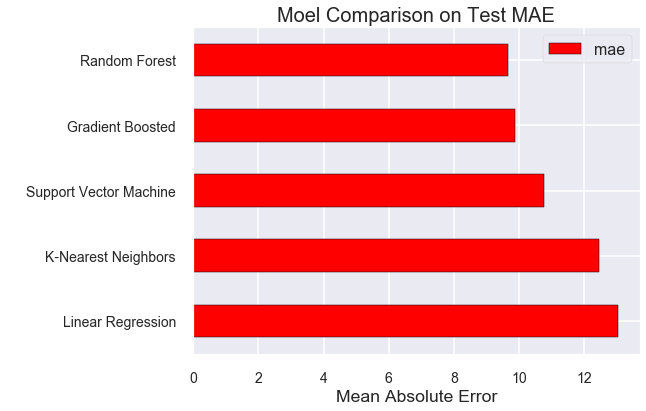

In [57]:
figsize(8, 6)
model_comparison = pd.DataFrame(
    {
        "model": [
            "Linear Regression", 
            "Support Vector Machine", 
            "Random Forest", 
            "Gradient Boosted",
            "K-Nearest Neighbors"
        ],
        'mae': [
            lr_mae, svm_mae, random_forest_mae, gradient_boosted_mae, knn_mae
        ]
    }
)
model_comparison.sort_values('mae', ascending=False).plot(
    x='model',
    y='mae',
    kind='barh',
    color='red',
    edgecolor='black'
)
plt.ylabel(' ')
plt.yticks(size=14)
plt.xlabel("Mean Absolute Error")
plt.xticks(size=14)
plt.title("Moel Comparison on Test MAE", size=20)